<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#搭建两层含有bias的全连接网络，隐藏层输出个数为20，激活函数都用sigmoid()" data-toc-modified-id="搭建两层含有bias的全连接网络，隐藏层输出个数为20，激活函数都用sigmoid()-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>搭建两层含有bias的全连接网络，隐藏层输出个数为20，激活函数都用sigmoid()</a></span></li></ul></div>

In [1]:
%matplotlib inline
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt


torch.manual_seed(1)    # reproducible

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())       

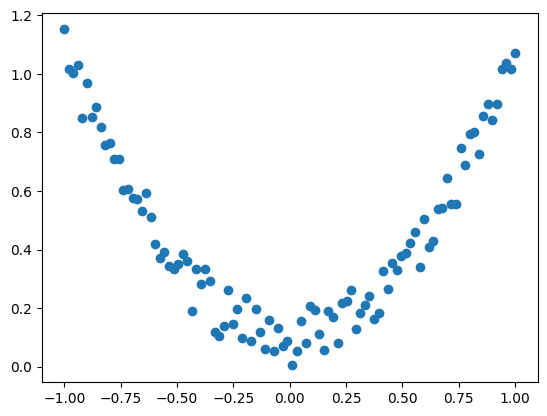

In [2]:
plt.scatter(x.numpy(), y.numpy())

## 搭建两层含有bias的全连接网络，隐藏层输出个数为20，激活函数都用sigmoid()

In [3]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.linear1 = torch.nn.Linear(n_feature, n_hidden, bias=True)
        self.sigmoid = torch.nn.Sigmoid()
        self.linear2 = torch.nn.Linear(n_hidden, n_output, bias=True)

    def forward(self, x):
        y_pred = self.linear2(self.sigmoid(self.linear1(x)))
        return y_pred

Net(
  (linear1): Linear(in_features=1, out_features=20, bias=True)
  (sigmoid): Sigmoid()
  (linear2): Linear(in_features=20, out_features=1, bias=True)
)


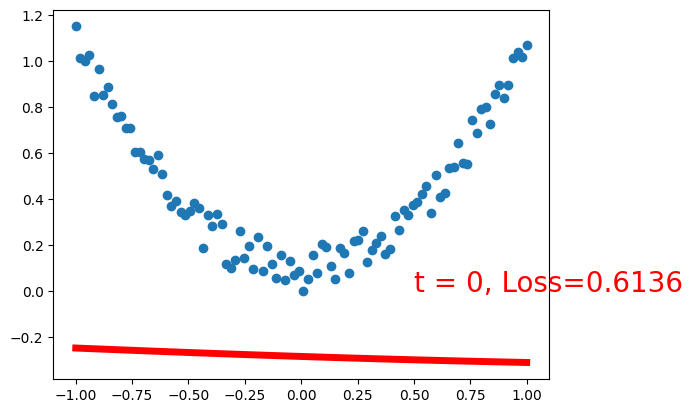

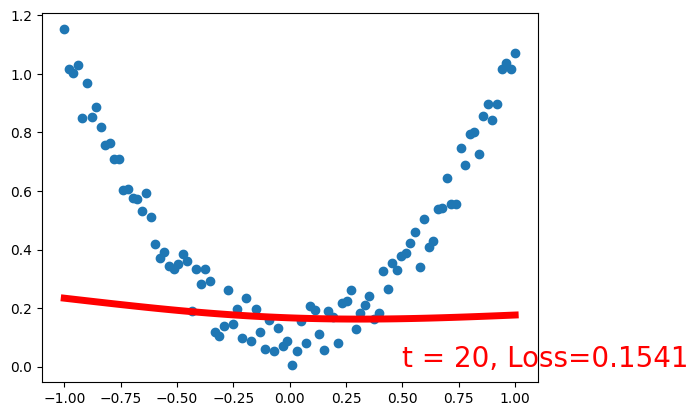

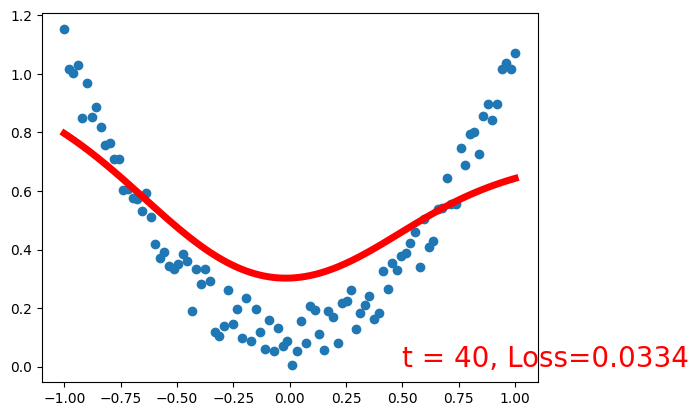

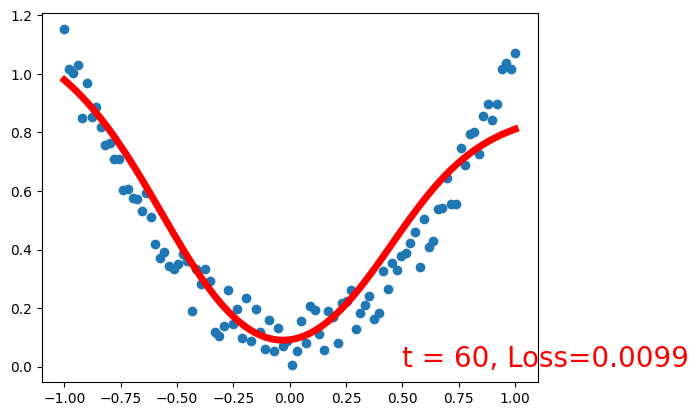

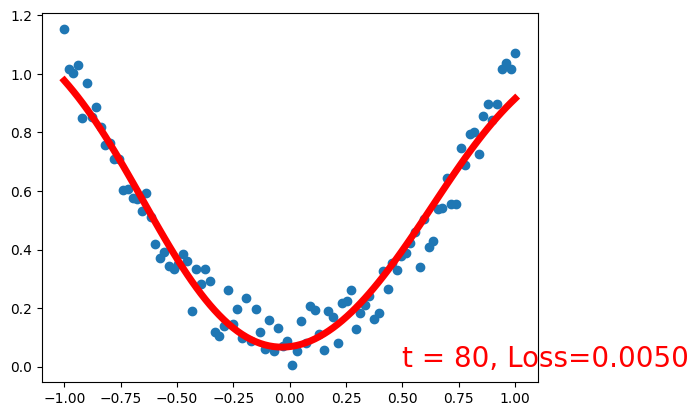

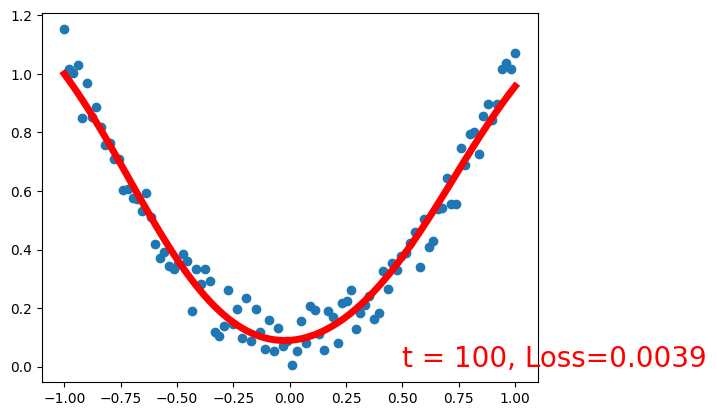

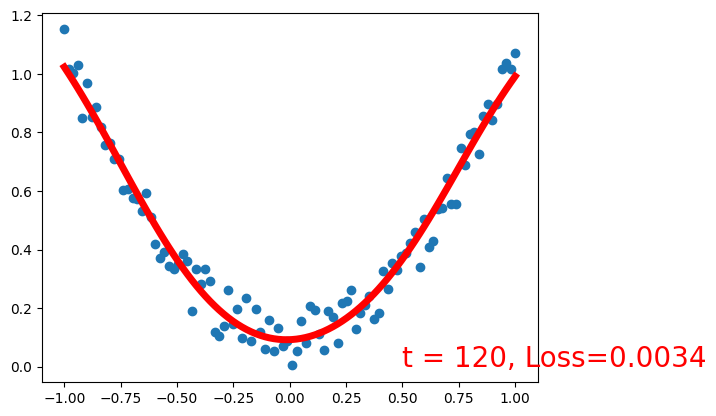

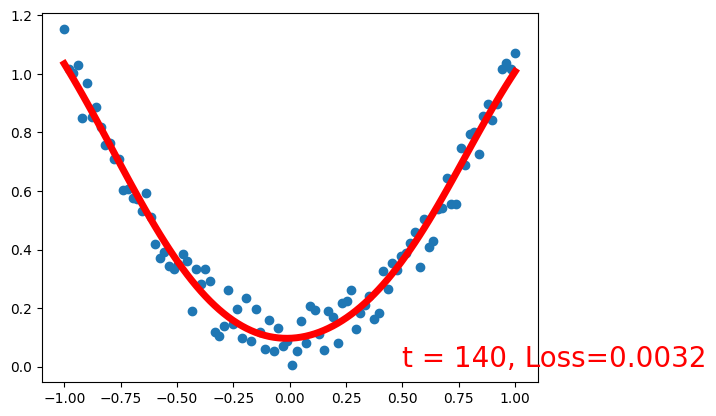

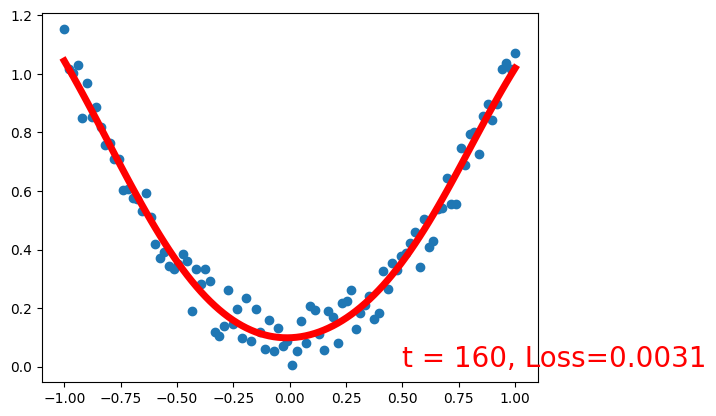

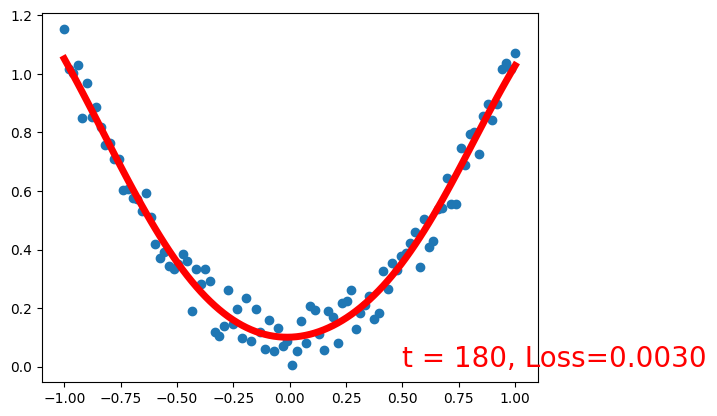

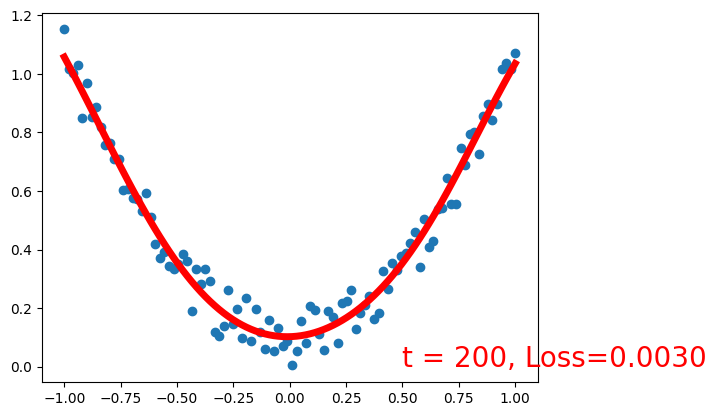

In [4]:
net = Net(n_feature=1, n_hidden=20, n_output=1)     # define the network
print(net)  # net architecture
# optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
optimizer = torch.optim.Adam(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

plt.ion()   # something about plotting

for t in range(201):
    prediction = net(x)     # input x and predict based on x
    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 20 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.numpy(), y.numpy())
        plt.plot(x.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 't = %d, Loss=%.4f' % (t, loss.data.numpy()), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)
        plt.show()

plt.ioff()
# plt.show()

In [11]:

# Validation:
w1 = torch.randn(1,20, requires_grad=True)
b1 = torch.randn(20, requires_grad=True)
w2 = torch.randn(20,1, requires_grad=True)
b2 = torch.randn(1, requires_grad=True)
h = x.mm(w1) + b1
h_sigmoid = 1 / (1 + torch.exp(-h))
y_pred = h_sigmoid.mm(w2) + b2
f = (y - y_pred).pow(2).sum()

f.backward()

w2_grad = 2 * (h_sigmoid.T) @ (y_pred - y)
b2_grad = (2 * (y_pred - y)).sum()
w1_grad = 2 *(x.T) @ (((y_pred - y) @ (w2.T)) * ((torch.exp(-h))/((1+torch.exp(-h))**2)))
b1_grad = 2 *(((y_pred - y) @ (w2.T)) * ((torch.exp(-h))/((1+torch.exp(-h))**2))).sum(dim=0)


print(f"W2.grad:{w2.grad} \n",f"W2.gradl:{w2_grad} \n")
print(f"b2.grad:{b2.grad} \n",f"b2.grad:{b2_grad} \n")
print(f"W1.grad:{w1.grad} \n",f"W1.grad:{w1_grad} \n")
print(f"b1.grad:{b1.grad} \n",f"b1.grad:{b1_grad} \n")


W2.grad:tensor([[-245.7227],
        [-159.0730],
        [ -67.4866],
        [-311.3191],
        [-209.0124],
        [-226.7560],
        [-209.4563],
        [-193.9550],
        [ -73.4560],
        [ -28.2905],
        [-120.5848],
        [-294.6848],
        [-332.4308],
        [-247.1168],
        [-309.5992],
        [-229.2792],
        [-111.3939],
        [-297.2051],
        [-187.4831],
        [-287.9650]]) 
 W2.gradl:tensor([[-245.7227],
        [-159.0730],
        [ -67.4866],
        [-311.3191],
        [-209.0124],
        [-226.7560],
        [-209.4563],
        [-193.9550],
        [ -73.4560],
        [ -28.2905],
        [-120.5848],
        [-294.6848],
        [-332.4308],
        [-247.1168],
        [-309.5992],
        [-229.2792],
        [-111.3939],
        [-297.2051],
        [-187.4831],
        [-287.9650]], grad_fn=<MmBackward0>) 

b2.grad:tensor([-406.8893]) 
 b2.grad:-406.8892822265625 

W1.grad:tensor([[ 5.0282e-01,  3.3779e+00,  4.5737e+00,